In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Set a fixed seed for reproducibility
random.seed(42)
np.random.seed(42)

In [5]:
def compute_distance(point1, point2):
    """
    Compute Euclidean distance between two points.

    Args:
    - point1 (numpy.ndarray): First point.
    - point2 (numpy.ndarray): Second point.

    Returns:
    - float: Euclidean distance between point1 and point2.
    """
    return np.linalg.norm(point1 - point2)

def initial_selection(data, k):
    """
    Select initial cluster representatives (centroids) randomly.

    Args:
    - data (numpy.ndarray): Input data.
    - k (int): Number of clusters.

    Returns:
    - list: Initial cluster representatives.
    """
    return random.sample(list(data), k)

def assign_cluster_ids(data, representatives):
    """
    Assign cluster IDs to data points based on closest representatives.

    Args:
    - data (numpy.ndarray): Input data.
    - representatives (list): Cluster representatives.

    Returns:
    - numpy.ndarray: Cluster IDs for each data point.
    """
    cluster_ids = []
    for point in data:
        distances = [compute_distance(point, rep) for rep in representatives]
        cluster_ids.append(np.argmin(distances))
    return np.array(cluster_ids)

def compute_cluster_representatives(data, cluster_ids, k):
    """
    Compute new cluster representatives (centroids).

    Args:
    - data (numpy.ndarray): Input data.
    - cluster_ids (numpy.ndarray): Cluster IDs for each data point.
    - k (int): Number of clusters.

    Returns:
    - numpy.ndarray: New cluster representatives.
    """
    representatives = []
    for i in range(k):
        cluster_data = data[cluster_ids == i]
        representatives.append(np.mean(cluster_data, axis=0))
    return np.array(representatives)

def silhouette_coefficient(data, cluster_ids, k):
    """
    Calculate the Silhouette coefficient.

    Args:
    - data (numpy.ndarray): Input data.
    - cluster_ids (numpy.ndarray): Cluster IDs for each data point.
    - k (int): Number of clusters.

    Returns:
    - float: Silhouette coefficient.
    """
    silhouette_vals = []
    for i in range(len(data)):
        a_i = np.mean([compute_distance(data[i], data[j]) for j in range(len(data)) if cluster_ids[j] == cluster_ids[i] and i != j])
        distances_to_other_clusters = [np.mean([compute_distance(data[i], data[j]) for j in range(len(data)) if cluster_ids[j] == c]) for c in range(k) if c != cluster_ids[i]]
        if distances_to_other_clusters:  # Check if the list is not empty
            b_i = np.min(distances_to_other_clusters)
        else:
            b_i = 0  # Or handle it differently based on your needs
        silhouette_vals.append((b_i - a_i) / max(a_i, b_i))
    return np.mean(silhouette_vals)

def print_silhouette_scores(data, max_k):
    """
    Perform k-means clustering and print Silhouette coefficients.

    Args:
    - data (numpy.ndarray): Input data.
    - max_k (int): Maximum number of clusters.
    """
    for k in range(1, max_k + 1):
        representatives = initial_selection(data, k)
        prev_cluster_ids = None
        while True:
            cluster_ids = assign_cluster_ids(data, representatives)
            if np.array_equal(prev_cluster_ids, cluster_ids):
                break
            prev_cluster_ids = cluster_ids
            representatives = compute_cluster_representatives(data, cluster_ids, k)
        silhouette_score = silhouette_coefficient(data, cluster_ids, k)
        print(f"Silhouette coefficient for k = {k}: {silhouette_score:.4f}")

def plot_silhouette(data, max_k, save_filename=None):
    """
    Perform k-means clustering and plot Silhouette coefficients.

    Args:
    - data (numpy.ndarray): Input data.
    - max_k (int): Maximum number of clusters.
    """
    silhouette_scores = []
    for k in range(2, max_k + 1):
        representatives = initial_selection(data, k)
        prev_cluster_ids = None
        while True:
            cluster_ids = assign_cluster_ids(data, representatives)
            if np.array_equal(prev_cluster_ids, cluster_ids):
                break
            prev_cluster_ids = cluster_ids
            representatives = compute_cluster_representatives(data, cluster_ids, k)
        silhouette_scores.append(silhouette_coefficient(data, cluster_ids, k))

    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Coefficient")
    plt.title("Silhouette Coefficient vs. Number of Clusters")
    if save_filename:
        plt.savefig(save_filename)
    plt.show()

Silhouette coefficient for k = 1: -1.0000
Silhouette coefficient for k = 2: 0.5111
Silhouette coefficient for k = 3: 0.5869
Silhouette coefficient for k = 4: 0.7654
Silhouette coefficient for k = 5: 0.6732
Silhouette coefficient for k = 6: 0.5598
Silhouette coefficient for k = 7: 0.4118
Silhouette coefficient for k = 8: 0.5238
Silhouette coefficient for k = 9: 0.5371


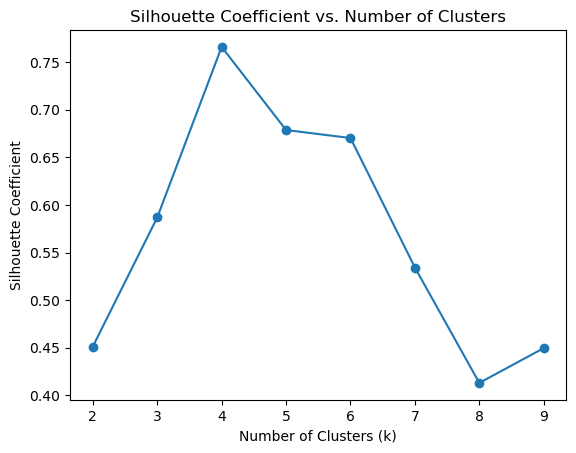

Silhouette plot saved as 'KMeansSynthetic.png' in the current directory.


In [6]:
# Generate synthetic data
N = 81  # Number of data points per cluster (approximately 326/4)

# Generate clusters with different distributions
clust1 = np.random.normal(5, 2, (N, 2))
clust2 = np.random.normal(15, 2, (N, 2))
clust3 = np.random.multivariate_normal([17, 3], [[1, 0], [0, 1]], N)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], N)

# Combine clusters into a single dataset
data = np.concatenate((clust1, clust2, clust3, clust4))

# Create an empty array to store cluster IDs
clusters = np.zeros((len(data), 1))

# Print and plot Silhouette coefficients for k values from 1 to 9
print_silhouette_scores(data, 9)

save_filename = "KMeansSynthetic.png"
plot_silhouette(data, 9, save_filename)
print(f"Silhouette plot saved as '{save_filename}' in the current directory.")